## PSU DS 200 
## Project Utility Jupyter Notebook 2B
### November 21, 2019
### Instructor: John Yen

#### This Jupyter Notebook is intended to be used to construct Project Deliverables #2 for the Mini-project of DS 200. 

## The goal of this utility is to generate word clouds from labelled tweets

#### Acknowledgement: The datascience module is developed by University of California Berkeley for its data 8 course.

#### Why generating word clouds?
- Word clouds provide a visualization that reflect the frequency of words through the font size of the word.
- Word clouds of each class can be compared with important features identified by decision trees.
- For example, the following questions can be asked:
    * Are important features in the word cloud?
    * Are there frequent words (i.e., words with large font in the word cloud) that are not important features?  If so, why?


In [1]:
!pip install datascience

### Install Wordcloud
We also need install the wordcloud python module

In [2]:
!pip install wordcloud

     |████████████████████████████████| 358kB 3.5MB/s eta 0:00:01


In [3]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 


from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

from graphviz import *

import pandas as pd
import numpy as np

from sklearn.externals import joblib

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [5]:
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning )

In [6]:
t1 = Table.read_table("Tagged-Tweets.csv", sep =',')
t1.show(10)

Support,text
1,**everyone screaming that were gonna die in 12 years bec ...
0,@colin_ban88 @starryplough67 @doc53384809 I said I took ...
1,@Darryl0007 @KTHopkins Hard man but you won't think it b ...
1,@eilperin @Fahrenthold @afreedma @jdawsey1 I hope the ot ...
1,@EliasCrimLaw @olcarcajou @FairQuestions @eliasmunshya @ ...
0,@Fahrenthold And Mulvaney said that climate change will ...
0,@FormerSenior @QandA @SBSNews Maybe stop lying. Climate ...
0,@GrantMcroberts Basically people who want us to do somet ...
0,@horsetoilets @LouiseStephen9 @drandyphung But the clima ...
1,@JGunlock @steph93065 Take them very seriously. 48 perce ...


### The code below extract the "class label" from the CSV file to find out the total number of positive/supportive vs negative/non-supportive tweets in the labelled data set.
### If you use Climage Change tweets, the column label for the class label is 'Support'.
### If you use Airline Sentiment tweets, the column label for the class label is 'airline_sentiment' (as shown in Lab9)

In [7]:
t1_positive = t1.where('Support', are.equal_to(1))
t1_negative = t1.where('Support', are.equal_to(0))
t1_positive

Support,text
1,**everyone screaming that were gonna die in 12 years bec ...
1,@Darryl0007 @KTHopkins Hard man but you won't think it b ...
1,@eilperin @Fahrenthold @afreedma @jdawsey1 I hope the ot ...
1,@EliasCrimLaw @olcarcajou @FairQuestions @eliasmunshya @ ...
1,@JGunlock @steph93065 Take them very seriously. 48 perce ...
1,@RichLowry @RichLowry you are obviously not very smart. ...
1,@ukmav @hilltopgina @elliethebookgal Yet he contributes ...
1,| Tell Congress: Take Action to Against Climate Change h ...
1,A new U.N. report predicts more powerful storms increase ...
1,Antarctica latest: Scientists to drill THREE KILOMETRES ...


In [8]:
positive_tweets = t1_positive.select("text")
positive_tweets

text
**everyone screaming that were gonna die in 12 years bec ...
@Darryl0007 @KTHopkins Hard man but you won't think it b ...
@eilperin @Fahrenthold @afreedma @jdawsey1 I hope the ot ...
@EliasCrimLaw @olcarcajou @FairQuestions @eliasmunshya @ ...
@JGunlock @steph93065 Take them very seriously. 48 perce ...
@RichLowry @RichLowry you are obviously not very smart. ...
@ukmav @hilltopgina @elliethebookgal Yet he contributes ...
| Tell Congress: Take Action to Against Climate Change h ...
A new U.N. report predicts more powerful storms increase ...
Antarctica latest: Scientists to drill THREE KILOMETRES ...


In [9]:
# Save the positive tweets as a text file
positive_tweet_text = positive_tweets.as_text()
positive_tweet_text

"text\n**everyone screaming that were gonna die in 12 years bec ...\n@Darryl0007 @KTHopkins Hard man but you won't think it b ...\n@eilperin @Fahrenthold @afreedma @jdawsey1 I hope the ot ...\n@EliasCrimLaw @olcarcajou @FairQuestions @eliasmunshya @ ...\n@JGunlock @steph93065 Take them very seriously. 48 perce ...\n@RichLowry @RichLowry you are obviously not very smart.  ...\n@ukmav @hilltopgina @elliethebookgal Yet he contributes  ...\n| Tell Congress: Take Action to Against Climate Change h ...\nA new U.N. report predicts more powerful storms increase ...\nAntarctica latest: Scientists to drill THREE KILOMETRES  ...\nAnyone who includes CO2 is plant food and more CO2 cause ...\nAs part of the Exelon Climate Change Investment Initiati ...\nCall yourself progressive but dont like climate change\nCentral Banks Want to Tackle Climate Change. Here's What ...\nClimate Change Could Erase Human History. These Archivis ...\nClimate change deniers bein like why are children leadin ...\nClimate

### Generate a word cloud using text of positive tweets

In [10]:
positive_wordcloud = WordCloud(max_words=100, background_color="white").generate(positive_tweet_text)

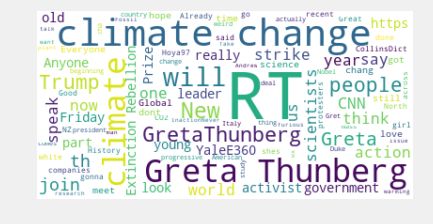

In [11]:
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
positive_wordcloud.to_file("positive_word_cloud_1.png")

In [13]:
t1_negative

Support,text
0,@colin_ban88 @starryplough67 @doc53384809 I said I took ...
0,@Fahrenthold And Mulvaney said that climate change will ...
0,@FormerSenior @QandA @SBSNews Maybe stop lying. Climate ...
0,@GrantMcroberts Basically people who want us to do somet ...
0,@horsetoilets @LouiseStephen9 @drandyphung But the clima ...
0,@kentlivenews Bet @GretaThunberg will be pissed that cli ...
0,@KTHopkins @DoringHaak These climate change freaks dont ...
0,@MarkYoungTruth I feel like this kid is a climate change ...
0,@postpolitics Why should I believe a young girl with asp ...
0,@TheOfficerTatum @Just_Fargo Can anyone PLEASE show me a ...


In [14]:
negative_tweet_text = t1_negative.select("text").as_text()
negative_tweet_text

"text\n@colin_ban88 @starryplough67 @doc53384809 I said I took  ...\n@Fahrenthold And Mulvaney said that climate change will  ...\n@FormerSenior @QandA @SBSNews Maybe stop lying. Climate  ...\n@GrantMcroberts Basically people who want us to do somet ...\n@horsetoilets @LouiseStephen9 @drandyphung But the clima ...\n@kentlivenews Bet @GretaThunberg will be pissed that cli ...\n@KTHopkins @DoringHaak These climate change freaks dont  ...\n@MarkYoungTruth I feel like this kid is a climate change ...\n@postpolitics Why should I believe a young girl with asp ...\n@TheOfficerTatum @Just_Fargo Can anyone PLEASE show me a ...\n[Lauren Chen (uploads) on YouTube] AOC CRIES Over Having ...\nAlberta truck convoy plans counter-protest to climate ra ...\nBecause theyre all in on the biggest hoax in history. #C ...\nClimate change wont be on the G-7 agenda at Trumps resor ...\nFox News Cuts Ties With Michael Knowles Over Greta Thunb ...\nMass hysteria: German lawmakers warn Greta Thunbergs cli ...\nP

In [15]:
negative_wordcloud = WordCloud(max_words=100, background_color="white").generate(negative_tweet_text)

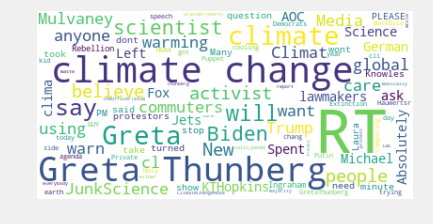

In [16]:
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
negative_wordcloud.to_file("negative_word_cloud_1.png")